# Exercise

**(1)** Find the best Lag order for your VAR specification:
> **(a)** Information criteria: AIC, HQ, SC, FPE

**(2)** Specify an overparametrized VAR model

**(3)** Perform diagnostic tests for both VAR models
> **(a)** Residual normality test

> **(b)** Heteroscedasticity test

> **(c)** Serial correlation

**(4)** Perform static and dynamic forecast for both VAR models:
> **(a)** Compare than in terms of RMSE and MAE

> **(b)** Estimate the forecast confidence intervals

**(5)** Estimate the impulse response function (IRF) for the optimal VAR model

In [25]:
library('data.table')
library('dplyr')
library('here')
library('ggplot2')
library('reshape')
library('vars')

Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Loading required package: urca
Warning message:
"package 'urca' was built under R version 3.6.3"Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

In [221]:
df = fread(here('src', 'data', 'eu_growth_ch6_sec10.csv'))
df = df_orig = df %>% mutate(date=as.Date(date))
head(df)

date,d_1988q1,d_1993q1,d_2000q1,g_fr,g_ger,g_it,g_us
1986-01-01,0,0,0,2.01,2.35,3.45,4.19
1986-04-01,0,0,0,2.39,2.51,2.77,3.73
1986-07-01,0,0,0,2.36,1.92,2.97,3.12
1986-10-01,0,0,0,2.06,2.33,2.70,2.84
1987-01-01,0,0,0,1.97,0.31,2.49,2.42
1987-04-01,0,0,0,1.94,1.41,3.37,3.10


In [21]:
df_melted = reshape::melt(df, id.vars = c('date'), measure.vars = c('g_fr', 'g_ger', 'g_it', 'g_us'))
head(df_melted)

date,variable,value
1986-01-01,g_fr,2.01
1986-04-01,g_fr,2.39
1986-07-01,g_fr,2.36
1986-10-01,g_fr,2.06
1987-01-01,g_fr,1.97
1987-04-01,g_fr,1.94


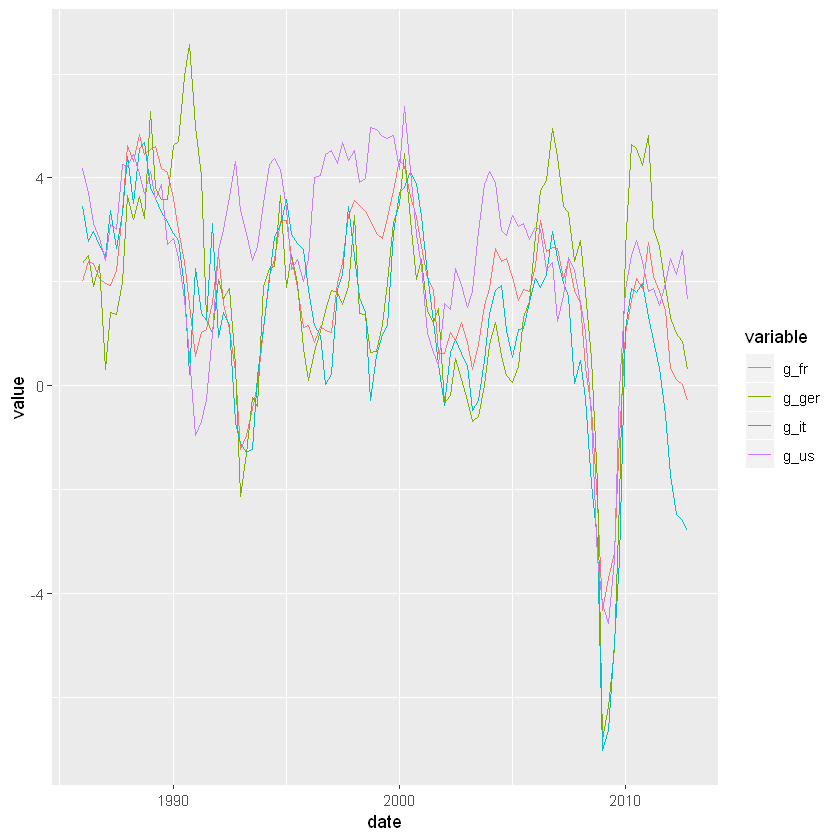

In [23]:
ggplot(df_melted, aes(x=date, y=value, colour=variable, group=variable)) + geom_line()

## **(1)** Find the best Lag order for your VAR specification:

The reduced form VAR(p) model is given by:

$
y_t = \mu + \Phi_1 y_{t-1} + ... + \Phi_p y_{t-p} + \epsilon_t, \quad \epsilon_t \sim WN(0, \Sigma)\\
$

where $y_t = [y_{1t} ... y_{nt}]^{'}$ is the vector of endogenous variables, and $\Phi_p$ is an $m x m$ matrix.

Its typically assumed that $y_t$ is a weakly stationary process, that is:

$
\mathbf{E}[y_t] = c\\
Var(y_T) = V_0 < \infty\\
Cov(y_t, y_{t-j}) = V_j
$

Furthermore, weakly stationarity is verified when all the roots $z$ of $det(\mathbf{I} - \Phi_1 z- ... - \Phi_p z^p) = 0$ are larger then one in absolute value.




### **(a)** Information criteria: AIC

The multivariate version of the AIC is given by:

$
AIC(j) = \ln|\Sigma_j| + \frac{1}{T}jm^2
$

As in the univariate case, the procedure to select the best $j$ VAR order that is optimal in the information criteria is to compute the AIC, for example, for a range $j=1,..,p_{max}$ and choose $j$ that minimizes the AIC.

In [26]:
var_df = df[, c('g_fr', 'g_ger', 'g_it', 'g_us')]
VARselect(var_df, lag.max = 5)

,1,2,3,4,5
AIC(n),-2.38472547,-2.82719607,-2.81319737,-2.90576027,-3.0979675
HQ(n),-2.17751082,-2.45420970,-2.27443927,-2.20123045,-2.2276660
SC(n),-1.87312761,-1.90631992,-1.48304293,-1.16632754,-0.9492565
FPE(n),0.09214241,0.05928441,0.06033855,0.05537811,0.0461995


According to the AIC the lag $j$ that minimizes it is equal to 5 lags.

In [27]:
opt_VAR = VAR(var_df, p = 5)
summary(opt_VAR)


VAR Estimation Results:
Endogenous variables: g_fr, g_ger, g_it, g_us 
Deterministic variables: const 
Sample size: 103 
Log Likelihood: -341.057 
Roots of the characteristic polynomial:
0.9356 0.9098 0.9098 0.8997 0.8997 0.8871 0.8871 0.8573 0.8573 0.8208 0.8208 0.7389 0.7389 0.7039 0.7039 0.6549 0.6549 0.6096 0.6096 0.6093
Call:
VAR(y = var_df, p = 5)


Estimation results for equation g_fr: 
g_fr = g_fr.l1 + g_ger.l1 + g_it.l1 + g_us.l1 + g_fr.l2 + g_ger.l2 + g_it.l2 + g_us.l2 + g_fr.l3 + g_ger.l3 + g_it.l3 + g_us.l3 + g_fr.l4 + g_ger.l4 + g_it.l4 + g_us.l4 + g_fr.l5 + g_ger.l5 + g_it.l5 + g_us.l5 + const 

          Estimate Std. Error t value Pr(>|t|)    
g_fr.l1   1.113124   0.137568   8.091  4.6e-12 ***
g_ger.l1 -0.146229   0.061864  -2.364 0.020457 *  
g_it.l1   0.177273   0.078042   2.272 0.025737 *  
g_us.l1   0.327561   0.086041   3.807 0.000270 ***
g_fr.l2   0.007994   0.170430   0.047 0.962703    
g_ger.l2  0.125115   0.079970   1.565 0.121547    
g_it.l2  -0.150247   0.08

## **(2)** Specify an overparametrized VAR model

In [28]:
over_VAR = VAR(var_df, p = 10)

## **(3)** Perform diagnostic tests for both VAR models
### **(a)** Residual normality test

In [33]:
nt1 = normality.test(opt_VAR)
nt1$jb.mul

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object opt_VAR
Chi-squared = 37.417, df = 8, p-value = 9.643e-06


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object opt_VAR
Chi-squared = 6.4588, df = 4, p-value = 0.1674


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object opt_VAR
Chi-squared = 30.958, df = 4, p-value = 3.122e-06



In [35]:
nt2 = normality.test(over_VAR)
nt2$jb.mul

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object over_VAR
Chi-squared = 5.7507, df = 8, p-value = 0.6751


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object over_VAR
Chi-squared = 2.9852, df = 4, p-value = 0.5603


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object over_VAR
Chi-squared = 2.7655, df = 4, p-value = 0.5978



As can be seem, the residuals of the VAR(10) does not reject the null hypothesis of normality whereas the VAR(5) does. 

### **(b)** Heteroscedasticity test

In order to test for heteroscedasticity of the residuals, we perform the ARCH test as follows:

In [38]:
arch1 = arch.test(opt_VAR)
arch1$arch.mul


	ARCH (multivariate)

data:  Residuals of VAR object opt_VAR
Chi-squared = 520.17, df = 500, p-value = 0.2577


In [39]:
arch2 = arch.test(over_VAR)
arch2$arch.mul


	ARCH (multivariate)

data:  Residuals of VAR object over_VAR
Chi-squared = 533.74, df = 500, p-value = 0.1435


For both of the models we do not reject the homoscedasticity hypothesis.

###  **(c)** Serial correlation

In [48]:
s1 = serial.test(opt_VAR, lags.pt = 2)
s1$serial

Warning message in pchisq(STATISTIC, df = PARAMETER):
"NaNs produced"Warning message in pchisq(STATISTIC, df = PARAMETER):
"NaNs produced"


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object opt_VAR
Chi-squared = 7.625, df = -48, p-value = NA


In [43]:
s2 = serial.test(over_VAR, lags.pt = 2)
s2$serial

Warning message in pchisq(STATISTIC, df = PARAMETER):
"NaNs produced"Warning message in pchisq(STATISTIC, df = PARAMETER):
"NaNs produced"


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object over_VAR
Chi-squared = 10.609, df = -128, p-value = NA


## **(4)** Perform for both VAR models:
### **(a)** Compare than in terms of RMSE and MAE

In [169]:
var_sample_df = var_df[1:88,]
var_forecast_df = var_df[89:dim(var_df)[1],]

In [180]:
opt_var_insample = VAR(var_sample_df, p = 5)
over_var_insample = VAR(var_sample_df, p = 10)

In [181]:
opt_var_static_oos_pred = predict(opt_var_insample, n.ahead = (dim(var_df)[1]-89))
over_var_static_oos_pred = predict(over_var_insample, n.ahead = (dim(var_df)[1]-89))

In [195]:
create_forecast_df = function(ls){
    list_out = list()
    for (name in names(ls)){
        list_out[[name]] = as.data.frame(ls[[name]])$fcst
    }
    df_out = do.call('cbind', list_out) %>% as.data.frame()
    
    return(df_out)
}

In [196]:
opt_var_static_oos_pred_df = create_forecast_df(opt_var_static_oos_pred$fcst)
over_var_static_oos_pred_df = create_forecast_df(over_var_static_oos_pred$fcst)

In [197]:
pred_list = list()
error_list = list()

In [198]:
mae_mse_error = function(df, real){
    list_mae = list()
    list_mse = list()
    for (name in colnames(df)){
        list_mae[[name]] = mean(abs(y[,name] - df[,name]))
        list_mse[[name]] = mean((y[,name] - df[,name])^2)
    }
    return(list(mae=list_mae, mse=list_mse))
}

In [199]:
pred_list1 = list()
pred_list1[['opt']] = opt_var_static_oos_pred_df
pred_list1[['over']] = over_var_static_oos_pred_df

In [200]:
error_list1 = list()
error_list1[['opt']] = mae_mse_error(pred_list1[['opt']], var_forecast_df)
error_list1[['over']] = mae_mse_error(pred_list1[['over']], var_forecast_df)

pred_list[['static']] = pred_list1
error_list[['static']] = error_list1

Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name] - df[, name]:
"longer object length is not a multiple of shorter object length"Warning message in y[, name]

In [203]:
do.call('cbind', error_list$static$opt)

,mae,mse
g_fr,1.75957,5.876318
g_ger,2.682934,12.57426
g_it,2.653588,12.77957
g_us,2.308495,9.760789


In [204]:
do.call('cbind', error_list$static$over)

,mae,mse
g_fr,1.662224,5.11503
g_ger,2.879412,13.75992
g_it,2.577013,11.96193
g_us,2.745778,13.77236


Interestingly, the error metrics provide us mixed results. For instance, the MAE and MSE for the g_ger, and g_us were lower for the VAR(5) model, whereas for the g_fr, and g_it the VAR(10) performed best.

### **(b)** Estimate the forecast confidence intervals



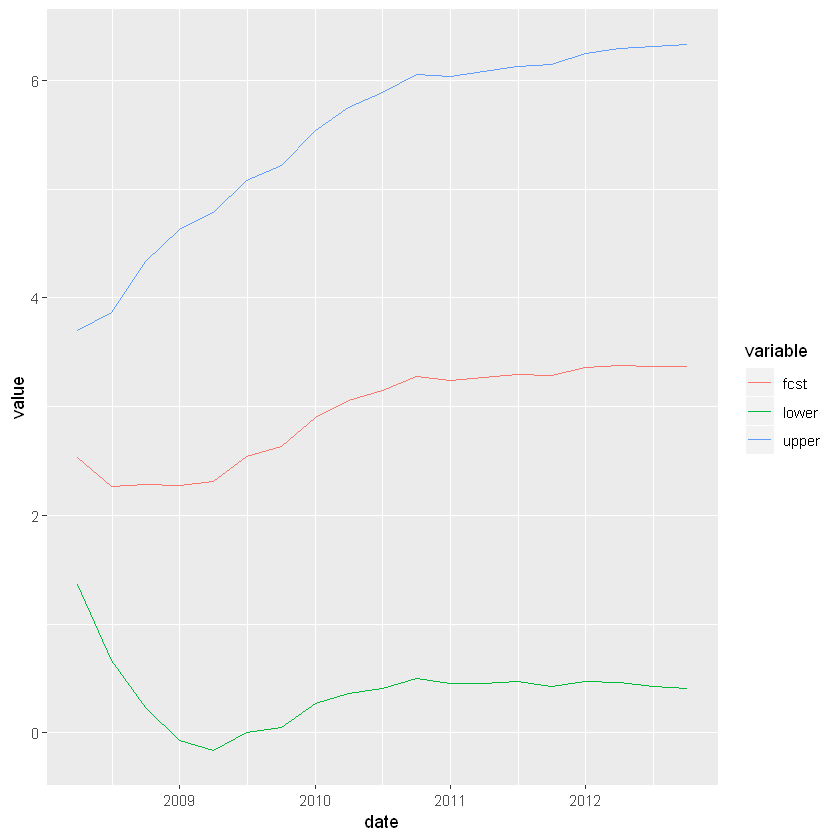

In [248]:
endog_name = 'g_fr'

melt_ci_df = opt_var_static_oos_pred$fcst[[name]] %>% as.data.frame() %>% dplyr::select(fcst, lower, upper) %>% mutate(date=as.Date(df_orig[90:dim(df_orig)[1], 'date']))
melt_ci_df = melt(melt_ci_df, id.vars = c('date'), measure.vars = c('fcst', 'lower', 'upper'))

ggplot(melt_ci_df, aes(x=date, y=value, color=variable, group=variable)) + geom_line()

**(5)** Estimate the impulse response function (IRF) for the optimal VAR model

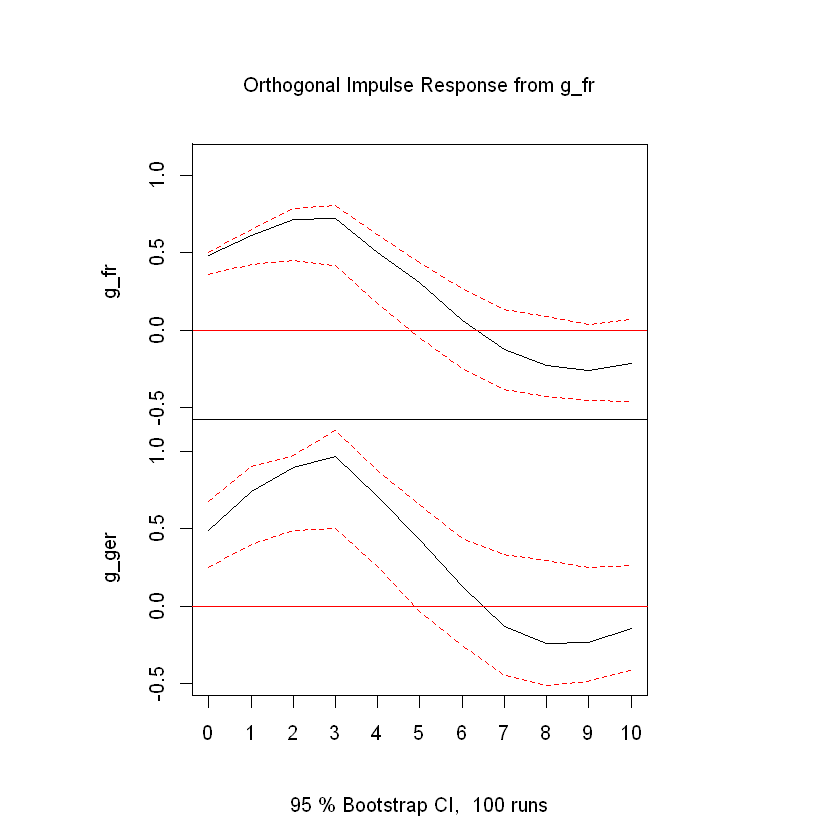

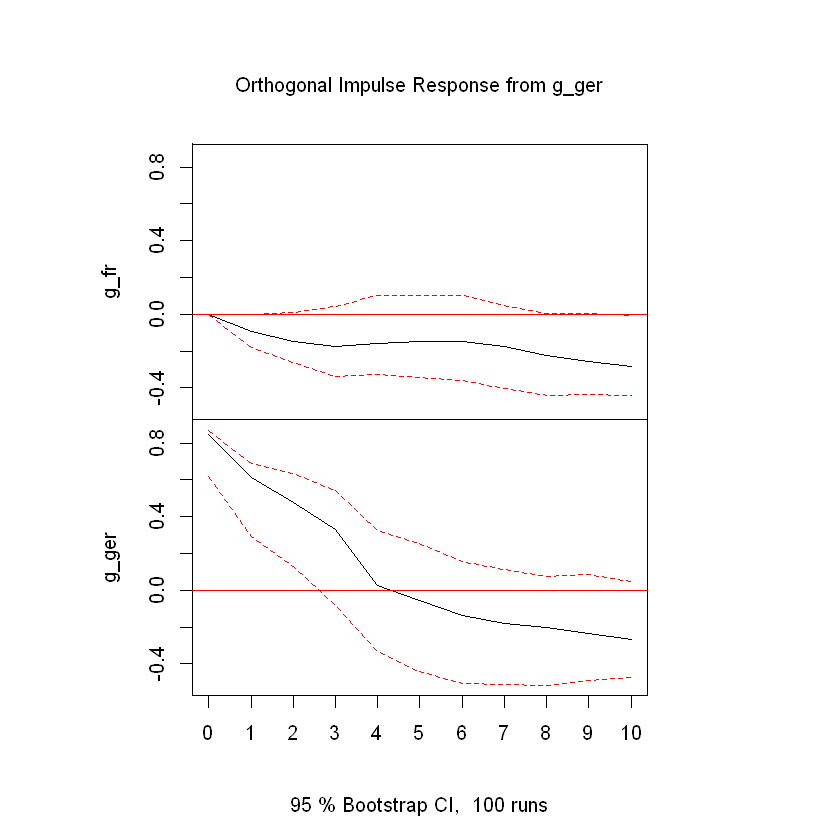

In [257]:
irf_res = irf(opt_VAR, impulse = c('g_fr', 'g_ger'), response = c('g_fr', 'g_ger'))
plot(irf_res)